In [1]:
# AI1104 - PROGRAMMING FOR AI PROJECT 
# Author : Vaishnavi W - AI20BTECH11025

####################################################################

# Goal : Use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.
# Data : https://www.kaggle.com/c/titanic/code
# Approach : K-Nearest Neighbours

####################################################################

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sb

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot as plt

In [3]:
# Upload CSV train and test files

train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
# Training set consists of 891 data points with 12 columns
# There are 11 features and one column with survival status, which are the labels for the data samples
# Testing set consists of 418 data points with 11 columns as the survival column is missing
# Each of the features are delt individually in the given code

In [8]:
# Cabin feature has many missing data points
# Hence, it is dropped

train.drop(['Cabin'], axis=1, inplace=True)
test.drop(['Cabin'], axis=1, inplace=True)

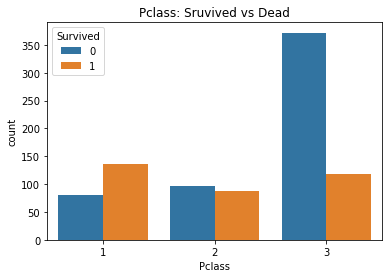

In [9]:
# Pclass: passenger class 1 = 1st, 2 = 2nd, 3 = 3rd
# There are no missing values and the datatype is integer

# Plot showing the Pclass and number of survivors
sb.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Pclass: Sruvived vs Dead')
plt.show()

# Plot below shows that the survival status of the passengers depends on the class they belong to. Hence, the feature is retained

In [10]:
# PassengerId
# This feature only indicates the number of passengers
# Hence, can be dropped
train.drop(['PassengerId'], axis=1, inplace=True)

In [11]:
# Name
# datatype of the feature is object
# Name feature can't be used to train the model. However, titles can be extracted and used for classification.
# Titles are placed in between a comma(", ") and a full stop(".")
# Use split() to split the string, obtain titles and append it to an empty list 

titles = []
for name in train['Name']:
  titles.append(name.split(", ")[1].split(".")[0])
  
#Count the unique titles using value_counts()
pd.Index(titles).value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
dtype: int64

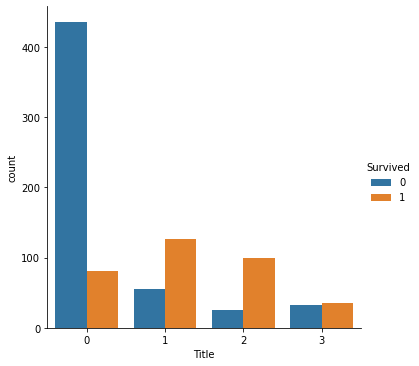

In [12]:
# Titles : 'Mr' - normal male, 'Miss' - normal unmarried female, 'Mrs' - normal married female, Others - Royalty/Position they hold in the society
# Assign ordinal labels as 'Mr' = 0, 'Miss' = 1, 'Mrs' = 2 and the other titles = 3  
for i in range(891):
  if (titles[i] == 'Mr'):
    titles[i] = 0
  elif (titles[i] == 'Miss'):
    titles[i] = 1
  elif (titles[i] == 'Mrs'):
    titles[i] = 2
  else:
    titles[i] = 3

# Add a feature 'Title' to the training data and drop the feature 'Name'
train['Title'] = titles
train.drop(['Name'], axis=1, inplace=True)

# Plot the number of survivors based on Titles
sb.catplot(x ="Title", hue ="Survived", kind ="count", data = train)

# Graph below shows that the survival status of passengers is related to Titles they own. Hence is an important feature

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

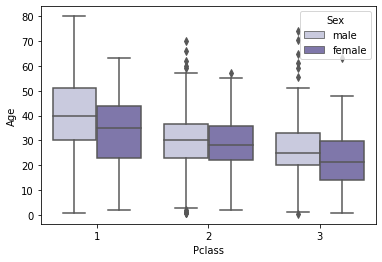

In [13]:
# Plot to compare Pclass, Age and Sex
#sb.catplot(x='Pclass', y='Age', data=train, kind='violin', hue='Sex')
sb.boxplot(x='Pclass',y='Age', hue = 'Sex', data=train,palette='Purples')

In [14]:
# Age
# There are only 714 out of 891 total values present, that is 177 missing data points
# The null values are filled with median values for age (not mean, as there are outliers)

# Above graph shows, median age varies with Pclass and Sex
# A more accurate way is by finding median values by grouping passengers based on Pclass and Sex

# pandas.dataframe.groupby() is used to group passengers
# pandas.dataframe.transform() applies the function (median) specified

train["Age"].fillna(train.groupby(["Sex","Pclass"])["Age"].transform("median"), inplace=True)

train['Age'].describe()

count    891.000000
mean      29.112424
std       13.304424
min        0.420000
25%       21.500000
50%       26.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [15]:
# No missing values
# Divide the passengers into 4 age groups and associate each of them with an ordinal label
age = []
for i in range(891):
  if (train.Age[i] < 20):
    age.append(1)
  elif (train.Age[i] < 40):
    age.append(2)
  elif (train.Age[i] < 60):
    age.append(3)
  else:
    age.append(4)

# Update Age feature with the assigned ordinals
train['Age'] = age

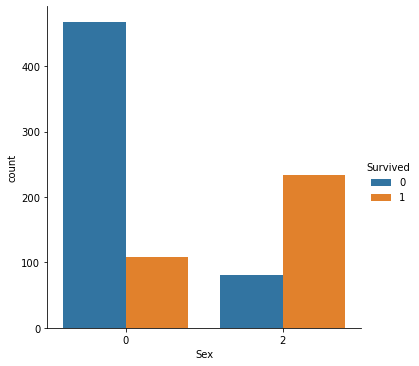

In [16]:
# Sex
# This feature is an object
# Convert it into numerical values with the object 'male' = 0, 'female' = 2

# Initilize an empty list and append feature values to it.
gender = []
for sex in train['Sex']:
  gender.append(sex)

# Assign numerical values
for i in range(891):
  if (gender[i] == 'male'):
    gender[i] = 0
  elif (gender[i] == 'female'):
    gender[i] = 2

# Update feature
train['Sex'] = gender

# Plot number of survivors based on their Sex
sb.catplot(x ="Sex", hue ="Survived", kind ="count", data = train)

# Graph below shows that suvival rate for males is less and more for females. The feature is thus important.

In [17]:
# SibSp: The feature defines family relations in this way
# Sibling = brother, sister, stepbrother, stepsister
# Spouse = husband, wife (mistresses and fiancés were ignored)

# Parch: The dataset defines family relations in this way
# Parent = mother, father
# Child = daughter, son, stepdaughter, stepson

# The above two features can be combined to create a new feature 'Family'
family = []

for i in range(891):
  family.append(train.Parch[i] + train.SibSp[i])

pd.Index(family).value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
dtype: int64

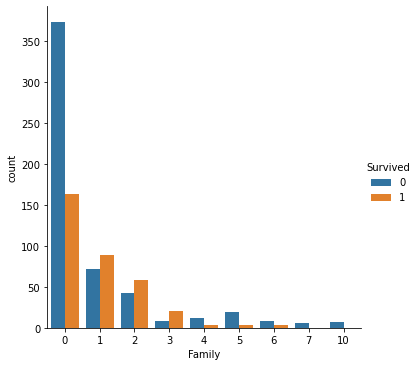

In [18]:
# Divide the passengers into 4 groups based on their family members on board and associate each of them with an ordinal
for i in range(891):
  if (family[i] == '0'):
    family[i] == 1
  elif (family[i] == '1'):
    family[i] == 2
  elif (family[i] == '2'):
    family[i] == 3
  else:
    family[i] == 4

# Update Family feature with the assigned ordinals
train['Family'] = family

# Drop the two features
train.drop(['SibSp'], axis=1, inplace=True)
train.drop(['Parch'], axis=1, inplace=True)

# Plot number of survivors based on the number of family members on board
sb.catplot(x ="Family", hue ="Survived", kind ="count", data = train)

# Graph shows survival status depends on the number of family members of passengers on board. Hence, the feature 'Family' can be used to train the ML model.

In [19]:
# Ticket: Ticket ID of the passengers. It mix of numeric and alphanumeric data types
# Group the passengers based on the first character of the ticket number

# Extracting the first characters and append them to an empty list
tickets = []
for x in train['Ticket']:
    tickets.append(x[0])
    
#Count the unique characters using value_counts()
pd.Index(tickets).value_counts()

3    301
2    183
1    146
P     65
S     65
C     47
A     29
W     13
4     10
7      9
F      7
6      6
L      4
5      3
8      2
9      1
dtype: int64

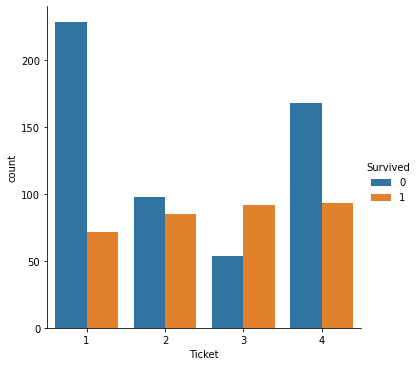

In [20]:
# Maximum number of tickets start with the characters '3', '2', '1' 
# Passengers are grouped in accordance with the initial character and ordinal numbers are assigned

for i in range(891):
    if (tickets[i] == '3'):
        tickets[i] = 1
    elif (tickets[i] == '2'):
        tickets[i] = 2
    elif (tickets[i] == '1'):
        tickets[i] = 3
    else:
        tickets[i] = 4

# Update the 'Ticket' feature
train['Ticket'] = tickets

# Plot number of survivors based on their Ticket characters
sb.catplot(x ="Ticket", hue ="Survived", kind ="count", data = train)

# Below graph shows the relation between Ticket and survival. The feature is thus retained

In [21]:
# Fare : The cost of the ticket
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

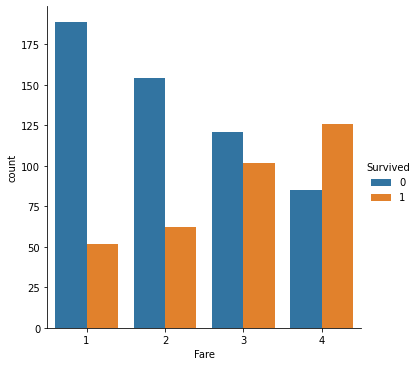

In [22]:
# Using the percentile values of Fare from the feature description, passengers can be grouped into 4 groups and be assigned group numbers
f = []
for i in range(891):
  if train.Fare[i] < 8:
    f.append(1)
  elif train.Fare[i] < 15:
    f.append(2)
  elif train.Fare[i] < 32: 
    f.append(3)
  else:
    f.append(4)

# Update Fare feature with ordinal labels 
train['Fare'] = f

# Plot number of survivors based on the ticker fare
sb.catplot(x ="Fare", hue ="Survived", kind ="count", data = train)

# Below graph shows that Ticket fare and survival are related. It is retained

In [23]:
# Embarked : Embarked implies where the traveler mounted from - Southampton, Cherbourg, and Queenstown
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [24]:
# There are 2 values missing 
# They are filled with the most common place, Southampton (taken from feature description)
train.Embarked = train.Embarked.fillna('S')

train['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

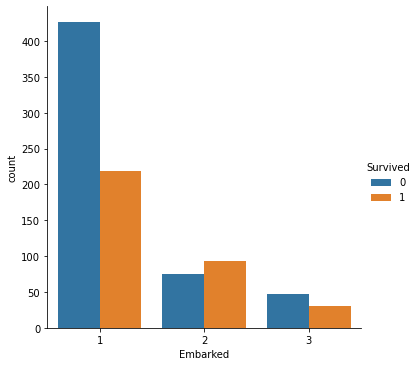

In [25]:
# No values missing
# Assign alphabetical labels with ordinal labels
e = []
for i in range(891):
  if (train.Embarked[i] == 'S'):
    e.append(1)
  elif (train.Embarked[i] == 'C'):
    e.append(2)
  elif (train.Embarked[i] == 'Q'):
    e.append(3)

# Update the feature
train['Embarked'] = e

# Plot number of survivors based on their place of Embarkation
sb.catplot(x ="Embarked", hue ="Survived", kind ="count", data = train)

# Below graph shows survival depends on place of Embarkation. The feature is thus retained to for ML modeling.

In [26]:
# The feature table after Data cleaning looks like below
train.head()

,Survived,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family
0,0,3,0,2,4,1,1,0,1
1,1,1,2,2,4,4,2,2,1
2,1,3,2,2,4,1,1,1,0
3,1,1,2,2,3,4,1,2,1
4,0,3,0,2,1,2,1,0,0


In [27]:
# Using K-Nearest Neighbours approach for classification
# Since, the test data has no labels given, the train data is split into test and validation sets to check the accuracy of the model and also find the optimum value of hyperparemeter - K
# 'train_test_split’ function is used to split the data
X_train, X_val, Y_train, Y_val = train_test_split(train.drop(['Survived'], axis=1), train.Survived,test_size=0.20, random_state=5)
accuracy = []
x = range(1,26)

# The model is trained using 'fit' method on X_train, Y_train
# The model is tested using 'predict' on X_test
# n_neighbours is the hyperparameter
# The model is fit and test on n_neighbours ranging from 1 to 25, accuracy is recorded
for i in x:
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, Y_train)  
    Y_pred = knn.predict(X_val)  
    accuracy.append(round(accuracy_score(Y_pred, Y_val) * 100, 2))

print(accuracy)

[75.98, 80.45, 82.12, 82.12, 83.8, 83.24, 83.24, 83.8, 84.36, 83.8, 84.92, 84.36, 83.8, 84.92, 84.36, 84.36, 83.24, 84.36, 84.36, 84.36, 84.36, 84.36, 84.36, 83.8, 83.8]


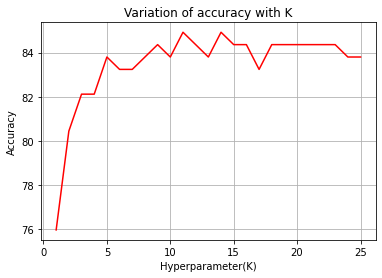

In [28]:
# Plot the accuracy obtained for different values of hyperparameter chosen for the KNN model
plt.plot(x,accuracy,'r')
plt.xlabel('Hyperparameter(K)')
plt.ylabel('Accuracy')
plt.title('Variation of accuracy with K')
plt.grid(True)
plt.show()

In [29]:
# The optimal hyperparameter is chosen as the one for which the accuracy is maximum
K = 11 #(Accuracy = 84.92)

In [30]:
# Data cleaning and Feature Engineering for the test data
# Name
titles_test = []
for name_test in test['Name']:
  titles_test.append(name_test.split(", ")[1].split(".")[0])
for i in range(418):
  if (titles_test[i] == 'Mr'):
    titles_test[i] = 1
  elif (titles_test[i] == 'Miss'):
    titles_test[i] = 2
  elif (titles_test[i] == 'Mrs'):
    titles_test[i] = 3
  else:
    titles_test[i] = 4

test['Title'] = titles_test
test.drop(['Name'], axis=1, inplace=True)

####################################################################

# Sex
gender_test = []
for sex in test['Sex']:
  gender_test.append(sex)

for i in range(418):
  if (gender_test[i] == 'male'):
    gender_test[i] = 0
  else: 
    gender_test[i] = 2

test['Sex'] = gender_test

####################################################################

# Age
age_test = []
for i in range(418):
  if (test.Age[i] < 20):
    age_test.append(1)
  elif (test.Age[i] < 40):
    age_test.append(2)
  elif (test.Age[i] < 60):
    age_test.append(3)
  else:
    age_test.append(4)

test['Age'] = age_test

####################################################################

# SibSp and Parch
family_test = []
for i in range(418):
  family_test.append(test.Parch[i] + test.SibSp[i])
for i in range(418):
  if (family_test[i] == 0):
    family_test[i] == 1
  elif (family_test[i] == 1):
    family_test[i] == 2
  elif (family_test[i] == 2):
    family_test[i] == 3
  else:
    family_test[i] == 4

test['Family'] = family_test

test.drop(['SibSp'], axis=1, inplace=True)
test.drop(['Parch'], axis=1, inplace=True)

####################################################################

# Ticket
tickets_test = []
for x in test['Ticket']:
    tickets_test.append(x[0])
for i in range(418):
    if (tickets_test[i] == '3'):
        tickets_test[i] = 1
    elif (tickets_test[i] == '2'):
        tickets_test[i] = 2
    elif (tickets_test[i] == '1'):
        tickets_test[i] = 3
    else:
        tickets_test[i] = 4
        
test['Ticket'] = tickets_test

####################################################################

# Fare
f_test = []
for i in range(418):
  if test.Fare[i] < 8:
    f_test.append(1)
  elif test.Fare[i] < 15:
    f_test.append(2)
  elif test.Fare[i] < 32: 
    f_test.append(3)
  else:
    f_test.append(4)

test['Fare'] = f_test

####################################################################

# Embarked
test.Embarked = test.Embarked.fillna('S')
e_test = []
for i in range(418):
  if (test.Embarked[i] == 'S'):
    e_test.append(1)
  elif (test.Embarked[i] == 'C'):
    e_test.append(2)
  elif (test.Embarked[i] == 'Q'):
    e_test.append(3)


test['Embarked'] = e_test

In [31]:
# The feature table after Data Processing looks like below
test.head()

,PassengerId,Pclass,Sex,Age,Ticket,Fare,Embarked,Title,Family
0,892,3,0,2,1,1,3,1,0
1,893,3,2,3,1,1,1,3,1
2,894,2,0,4,2,2,3,1,0
3,895,3,0,2,1,2,1,1,0
4,896,3,2,2,1,2,1,3,2


In [32]:
# Use KNN to predict the survival status of the passengers in the test data
# Hyperparameter is chosen from above graph, that which had the highest accuracy on training data
# The 'fit' data is the train data 
# The 'predict' data is the test data with the PassengerId dropped
knn = KNeighborsClassifier(n_neighbors = K) 
knn.fit(train.drop(['Survived'], axis=1), train['Survived'])  
survived_pred = knn.predict(test.drop(['PassengerId'], axis=1))  

In [33]:
# Predicted survival status of the passengers of the test data given against PassengerId
Output = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": survived_pred})

In [34]:
Output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [35]:
Output.to_csv('titanic_submission.csv', index = False)